# Brain Age Prediction SVRkernel

In [17]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [57]:
from sklearn.svm import SVR
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class SVRRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="SVR"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = SVR
        if params is None:
            self.params = {
                'kernel': 'rbf',
                'C': 1.0,
                'epsilon': 0.1,
                'gamma': 'scale'
            }
        if params_space is None:
            self.params_space = {
                'C': Real(0.01, 5.0, prior='log-uniform'),
                'gamma': Real(0.01, 1.0, prior='log-uniform'),
                'epsilon': Real(0.001, 1.0),
                'kernel': Categorical(['rbf', 'poly'])
            }

In [58]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = SVRRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'magenta'
nameset = 'SVR'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [60]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


c:\python_env\brain_age_env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [4.999999999999999, 1.0, 0.01, 'rbf'] before, using random point [3.6946137030864312, 0.9285783147665466, 0.2506885088093937, 'poly']
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [7]:
with open(f'results_model/opt_model.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [7]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

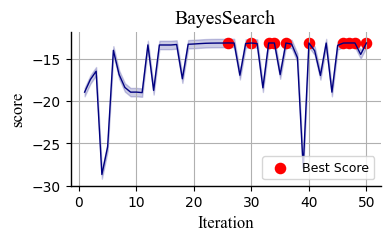

Top 1: Iteration 26, Score -13.108239043035638
Top 2: Iteration 48, Score -13.11121360361554
Top 3: Iteration 47, Score -13.111253348828864
Top 4: Iteration 50, Score -13.111450562197012
Top 5: Iteration 40, Score -13.111967358681108
Top 6: Iteration 34, Score -13.113624411073795
Top 7: Iteration 33, Score -13.115303674318918
Top 8: Iteration 36, Score -13.115814409542548
Top 9: Iteration 30, Score -13.118233177046042
Top 10: Iteration 46, Score -13.118288494867269


In [51]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [52]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'C': 10.0, 'epsilon': 1.0, 'gamma': 0.02418355392949712, 'kernel': 'rbf'},
 {'C': 10.0, 'epsilon': 1.0, 'gamma': 0.023061434610368053, 'kernel': 'rbf'},
 {'C': 10.0, 'epsilon': 1.0, 'gamma': 0.02304968091219599, 'kernel': 'rbf'},
 {'C': 10.0, 'epsilon': 1.0, 'gamma': 0.02299494541794743, 'kernel': 'rbf'},
 {'C': 10.0, 'epsilon': 0.001, 'gamma': 0.02688333567945569, 'kernel': 'rbf'},
 {'C': 10.0,
  'epsilon': 0.8796007852229832,
  'gamma': 0.02604876951657928,
  'kernel': 'rbf'},
 {'C': 10.0,
  'epsilon': 0.850403907847117,
  'gamma': 0.02240164725117965,
  'kernel': 'rbf'},
 {'C': 10.0, 'epsilon': 0.001, 'gamma': 0.024763796097663295, 'kernel': 'rbf'},
 {'C': 10.0, 'epsilon': 1.0, 'gamma': 0.027106249623015992, 'kernel': 'rbf'},
 {'C': 10.0, 'epsilon': 0.001, 'gamma': 0.02431062173039119, 'kernel': 'rbf'}]

In [53]:
best_params=opt_model.best_params_

# Training

In [61]:
model.model_params_train= {
            'max_iter': 500
        }

In [33]:
model.fit_params_train= {
           
        }

In [62]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

c:\python_env\brain_age_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future versi

In [12]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [13]:
with open('results_model/results_training.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [16]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     4211.
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:50:13   Log-Likelihood:                -4993.7
No. Observations:                1323   AIC:                             9991.
Df Residuals:                    1321   BIC:                         1.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0059      0.732      5.469      0.0

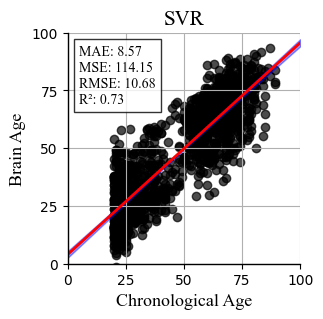

Error medio absoluto: 8.57367912742773
Error cuadrático medio: 114.15231451365534
Raíz del error cuadrático medio: 10.684208651727808
Coeficiente de determinación (R²): 0.729613163934006


In [63]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [64]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 133/133 [03:55<00:00,  1.77s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 133/133 [04:28<00:00,  2.02s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 133/133 [04:10<00:00,  1.88s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [03:39<00:00,  1.67s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [03:40<00:00,  1.67s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [03:42<00:00,  1.69s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [03:42<00:00,  1.69s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [03:42<00:00,  1.69s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [03:42<00:00,  1.68s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [03:41<00:00,  1.67s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 133/133 [04:12<00:00,  1.90s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 133/133 [03:53<00:00,  1.75s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 133/133 [03:50<00:00,  1.74s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [04:10<00:00,  1.90s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [04:10<00:00,  1.90s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [04:22<00:00,  1.99s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [04:29<00:00,  2.04s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [04:51<00:00,  2.21s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [04:16<00:00,  1.95s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 132/132 [03:43<00:00,  1.69s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


100%|██████████| 133/133 [03:31<00:00,  1.59s/it]


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=4.999999999999999, epsilon=1.0, gamma=0.02388038990317669, max_iter=500)


 89%|████████▊ | 118/133 [03:07<00:23,  1.59s/it]


KeyboardInterrupt: 

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [7]:
shap_summary_sorted_CN

[('IAF_OCC_right', 2641.849940309976),
 ('IAF_OCC_left', 1963.3195249283774),
 ('TF_MFG_right', 1654.8233810297438),
 ('Low_subj_spec_RPD_CING_right', 1477.3729918177542),
 ('Low_subj_spec_EPP_OCC_right', 1372.1366078540937),
 ('High_subj_spec_EPP_CING_right', 1163.5686213835752),
 ('High_subj_spec_RPD_CING_right', 1158.0482899872104),
 ('Alpha2_canon_RPD_CING_right', 1019.4528739227706),
 ('Low_subj_spec_RPD_OCC_left', 978.7797621466473),
 ('IAF_ORB_right', 957.8948631373398),
 ('TF_INS_left', 949.7621843461939),
 ('IAF_HPC_left', 905.578011119701),
 ('Low_subj_spec_EPP_CING_left', 891.2259726487227),
 ('Low_subj_spec_EPP_PARIET_right', 847.7681395282963),
 ('Low_subj_spec_EPP_PARIET_left', 843.7506839864782),
 ('IAF_ORB_left', 843.4675871559122),
 ('TF_IFG_left', 706.3204279756078),
 ('Low_subj_spec_RPD_CING_left', 690.6379474777103),
 ('TF_SFG_left', 683.2689424167022),
 ('Alpha2_canon_RPD_PARIET_right', 680.7100434810584),
 ('Alpha2_canon_EPP_PARIET_right', 680.1983690894222),
 ('I

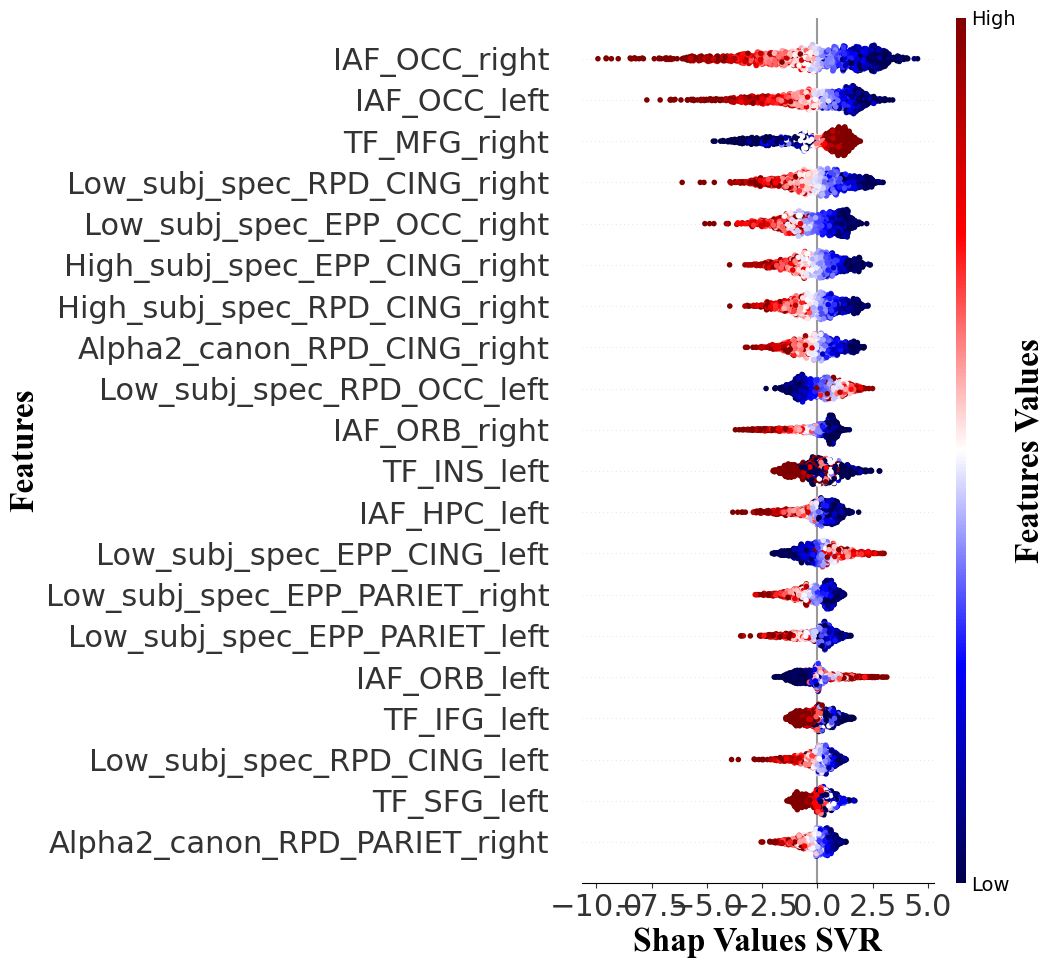

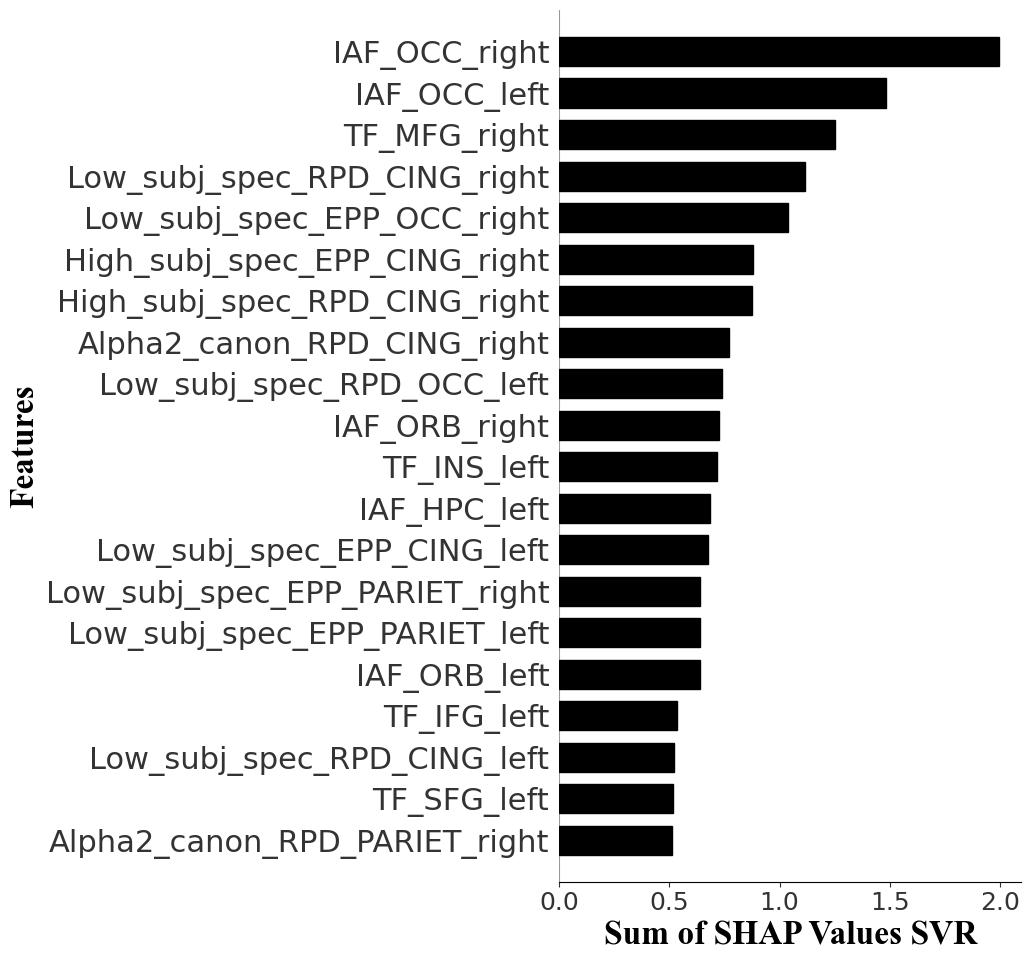

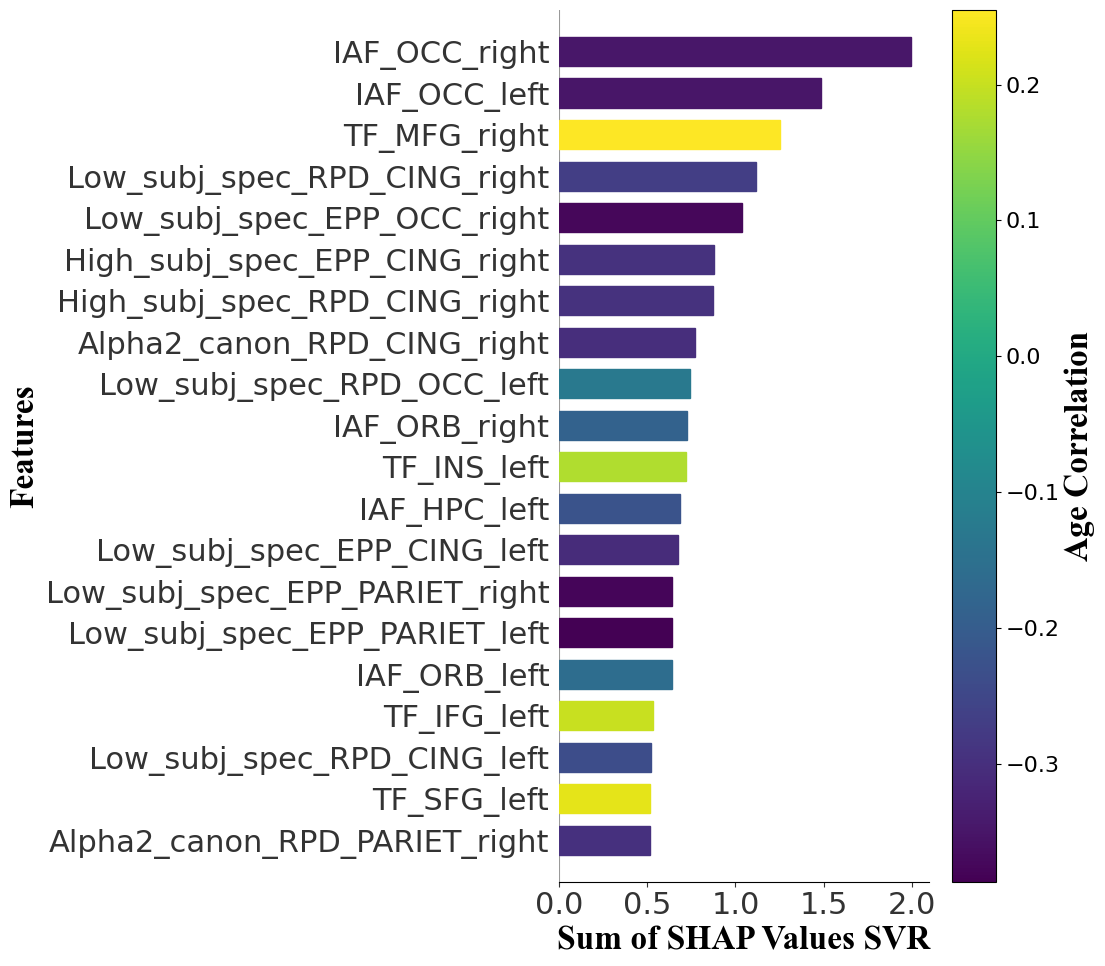

In [22]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [13]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

CING_right: 1.000000
OCC_right: 0.833046
OCC_left: 0.610591
MFG_right: 0.343435
ORB_right: 0.198798


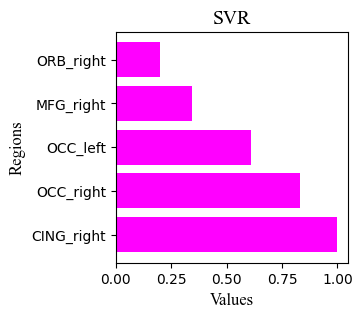

In [14]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

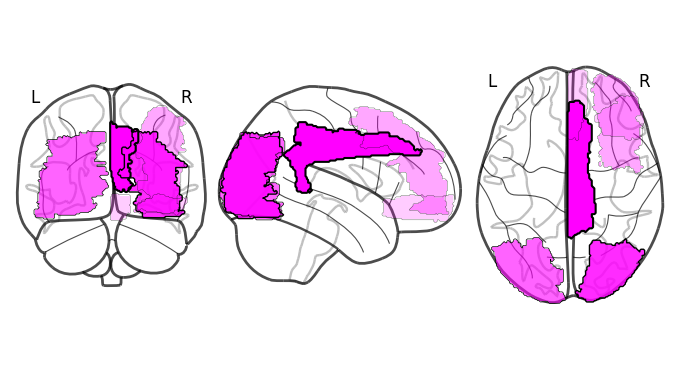

In [15]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)